In [14]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#load  data
data = pd.read_csv('results_simple.csv')


data.describe()





# print("coverage per domain:")
# #print(data.groupby('config')['domain'].value_counts())

# icaps_cvg = icaps.groupby( [ "costpart", "dom"] ).size().to_frame(name = 'coverage').reset_index()
# icaps_cvg_t = icaps_cvg.pivot(index='dom', columns='costpart', values='coverage')

# icaps_cvg_t.rename(index=str, columns={"costpart": "domain"})
# icaps_cvg_t.to_csv('icaps_cvg.csv')

# print(icaps_cvg_t)

,agent,privateActions,useStateIDs,nTo1Mapping,SecureMAFS,projectedHeuristic,receivedStates,nia,ia,pi,...,post,leakage,gt_ia,gt_pi,gt_pd,gt_pn,gt_post,gt_leakage,ratio,correct
count,504.000000,504,504,504,504,504,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.00000,504.000000,504.000000,504.000000,5.040000e+02,504
mean,0.484127,0.496032,0,1,0.492063,0.5,59231.569444,48.642857,9.940476,13.696429,...,17021.514614,893.328464,1.654762,13.317460,47.84127,4.476190,13396.403062,4518.440015,2.169128e-01,0.136905
std,0.500245,0.500481,0,0,0.500434,0.500497,110638.888875,75.986837,14.581383,26.596258,...,31351.407540,1442.135305,1.426760,20.309201,58.88688,15.461985,24177.046797,7697.096037,2.522353e-01,0.344088
min,0.000000,False,False,1,False,False,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000005,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-9.312269e-08,False
25%,0.000000,0,0,1,0,0,121.250000,5.000000,1.000000,0.000000,...,61.537788,0.321928,1.000000,0.000000,3.00000,0.000000,51.620508,11.124893,7.295830e-11,0
50%,0.000000,0,0,1,0,0.5,1392.000000,18.000000,3.000000,1.000000,...,5822.847774,71.563876,1.000000,2.000000,25.00000,0.000000,4453.879905,1394.436528,9.445471e-02,0
75%,1.000000,1,0,1,1,1,55707.000000,60.000000,12.000000,12.250000,...,18847.347514,1520.017901,2.000000,17.000000,64.00000,0.000000,15816.884788,5227.189550,3.799745e-01,0
max,1.000000,True,False,1,True,True,530010.000000,583.000000,75.000000,123.000000,...,169850.325020,7933.173000,11.000000,80.000000,210.00000,80.000000,129771.285264,40248.448635,1.117738e+00,True


In [16]:
#compute IPC score over ratio
dataIPC = data.loc[(data['nTo1Mapping']== 1)]

dataIPC['config'] = dataIPC[['SecureMAFS','projectedHeuristic']].apply(lambda x: '-'.join(x.map(str)), axis=1)

print("solved problems:")
print(dataIPC['config'].value_counts())

dataIPCr = dataIPC[['config','domain','problem','agent','ratio']]

dataIPCr = dataIPCr.groupby( [ 'config','domain','problem','agent'] ).mean()

dataIPCr = dataIPCr.reset_index()


dataIPCr['domain_problem_agent'] = dataIPCr[['domain','problem','agent']].apply(lambda x: '-'.join(x.map(str)), axis=1)
dataIPCr = dataIPCr[['config','domain_problem_agent','ratio']]

dataIPCr = dataIPCr.pivot(index='domain_problem_agent', columns='config', values='ratio')
dataIPCr = dataIPCr.reset_index()

dataIPCr = dataIPCr.dropna()

dataIPCr['dom'] = dataIPCr.domain_problem_agent.str[:3]

#print(dataIPCr)


dataIPCg = dataIPCr.groupby( 'dom' )[ 'False-False','False-True','True-False','True-True'].sum()

dataIPCp = dataIPCg.reset_index()

dataIPCp = dataIPCp[['dom','False-False','False-True','True-False','True-True']]

print(dataIPCp)


sum_row = {col: dataIPCp[col].sum() for col in dataIPCp}
# Turn the sums into a DataFrame with one row with an index of 'Total':
sum_df = pd.DataFrame(sum_row, index=["Total"])
# Now append the row:
dataIPCp = dataIPCp.append(sum_df)

print(dataIPCp)

dataIPCp.to_csv('results_IPCScore.csv')


solved problems:
False-True     128
False-False    128
True-True      124
True-False     124
Name: config, dtype: int64
config  dom  False-False  False-True  True-False  True-True
0       blo     5.175624    4.845309    5.175624   4.845309
1       dep     0.084749    0.125585    0.084749   0.125585
2       dri     0.171277    0.167018    0.171277   0.167018
3       ele     3.374717    3.399776    3.351709   3.379515
4       lan     1.282652    1.556357    0.618095   0.661818
5       log     5.822554    6.139326    5.441122   5.753616
6       rov     3.757108    3.720054    2.783244   2.757592
7       sat     3.104890    3.104890    1.959380   1.959380
8       sok     0.047685    0.055747    0.047768   0.055747
9       tax     0.000000    0.000000    0.000000   0.000000
10      uav     2.916213    3.137313    2.302019   2.523120
11      wir     0.192437    0.192437    0.192437   0.192437
12      woo     0.000000    0.000000    0.000000   0.000000
13      zen     3.040394    3.157234    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


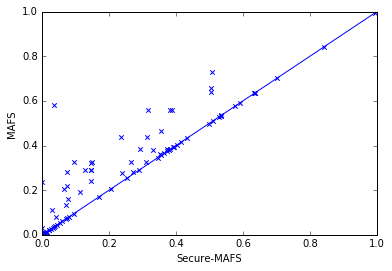

In [17]:
#Scatterplot MAFS vs. Secure-MAFS
dataS1 = data.loc[(data['nTo1Mapping']== 1) & (data['projectedHeuristic']== False)]
dataS1['config'] = dataS1[['SecureMAFS']].apply(lambda x: 'SecureMAFS-'.join(x.map(str)), axis=1)
dataS1['domain_problem_agent'] = dataS1[['domain','problem','agent']].apply(lambda x: '-'.join(x.map(str)), axis=1)


dataS1r = dataS1[['config','domain_problem_agent','ratio']]

dataS1p = dataS1r.pivot(index='domain_problem_agent', columns='config', values='ratio')
dataS1p = dataS1p.reset_index()


dataS1p['dom'] = dataS1p.domain_problem_agent.str[:3]

#print(dataS1p)

cm = plt.cm.get_cmap('hot') 

ax = dataS1p.plot.scatter(x='True', y='False',xlim=[0,1],ylim=[0,1], marker ='x')
ax.set_xlabel("Secure-MAFS")
ax.set_ylabel("MAFS")

plt.plot( [0,1],[0,1] )

plt.savefig('MAFS-vs-SecureMAFS.pdf')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


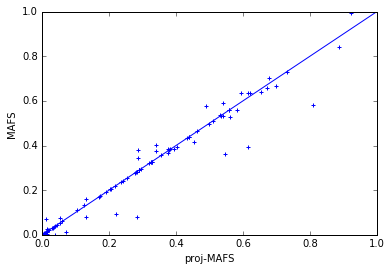

In [18]:
#Scatterplot MAFS vs. proj-MAFS
dataS2 = data.loc[(data['nTo1Mapping']== 1) & (data['SecureMAFS']== False)]
dataS2['config'] = dataS2[['projectedHeuristic']].apply(lambda x: 'proj-'.join(x.map(str)), axis=1)
dataS2['domain-problem-agent'] = dataS2[['domain','problem','agent']].apply(lambda x: '-'.join(x.map(str)), axis=1)


dataS2r = dataS2[['config','domain-problem-agent','ratio']]

dataS2p = dataS2r.pivot(index='domain-problem-agent', columns='config', values='ratio')

#print(dataS2p)

ax = dataS2p.plot.scatter(x='True', y='False',xlim=[0,1],ylim=[0,1], marker ='+')

ax.set_xlabel("proj-MAFS")
ax.set_ylabel("MAFS")

plt.plot( [0,1],[0,1] )
plt.savefig('MAFS-vs-projMAFS.pdf')

In [11]:
ts = pd.read_csv('ts_cache_cleaned.csv')

ts.describe()

print(ts)

    agentPrivateVariables  agentDomainSize         ts         ia        nia  \
0                       1                2   3.906891   3.584963   1.584963   
1                       1                3   8.997179   8.807355   5.977280   
2                       1                4  15.999978  15.906891  11.999648   
3                       1                5  25.000000  24.954196  19.999999   
4                       2                2   7.813781   7.169925   5.169925   
5                       3                2  11.720672  10.754888   8.754888   
6                       1                6  36.000000  35.977280  30.000000   
7                       5                2  19.534453  17.924813  15.924813   
8                       1                7  49.000000  48.988685  42.000000   
9                       4                2  15.627562  14.339850  12.339850   
10                      2                3  17.994359  17.614710  14.784635   
11                      2                4  31.99995

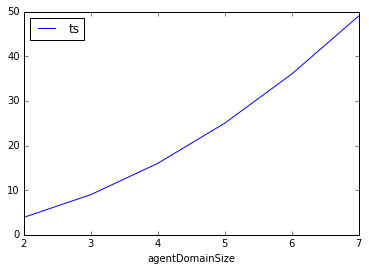

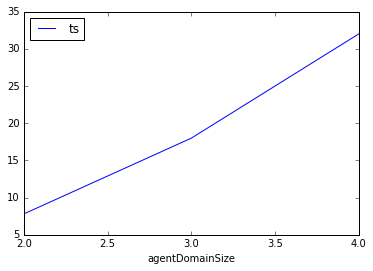

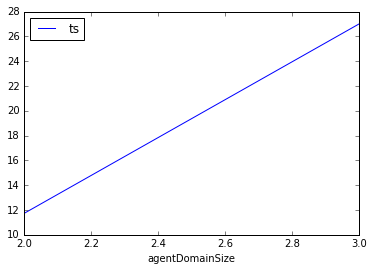

In [13]:
ts1 = ts.loc[ts['agentPrivateVariables']== 1]
ts1.plot(x='agentDomainSize',y='ts')

ts2 = ts.loc[ts['agentPrivateVariables']== 2]
ts2.plot(x='agentDomainSize',y='ts')

ts3 = ts.loc[ts['agentPrivateVariables']== 3]
ts3.plot(x='agentDomainSize',y='ts')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


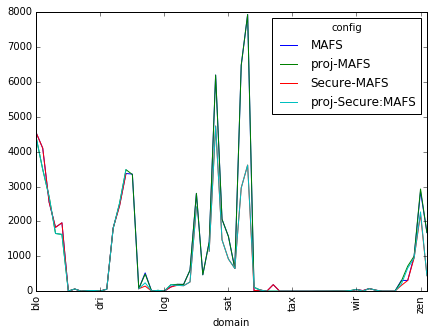

In [102]:
#plot real leakage values

#Scatterplot MAFS vs. Secure-MAFS
#print(data)
datal = data.loc[(data['nTo1Mapping']== 1) & (data['agent']== 1)]
datal['config'] = datal[['SecureMAFS','projectedHeuristic']].apply(lambda x: '-'.join(x.map(str)), axis=1)
datal['domain_problem'] = datal[['domain','problem']].apply(lambda x: '-'.join(x.map(str)), axis=1)

datal = datal[['config','domain_problem','leakage']]

datal = datal.groupby( [ 'config','domain_problem'] ).mean()
datal = datal.reset_index()

datalp = datal.pivot(index='domain_problem', columns='config', values='leakage')

datalp[datalp < 0] = 0

datalp = datalp.reset_index()
#print(datalp)



datalp['domain'] = datalp.domain_problem.str[:3]

datalp = datalp.rename(index=str, columns={'False-False':"MAFS",'False-True':"proj-MAFS",'True-False':"Secure-MAFS",'True-True':"proj-Secure:MAFS"})

#print(datalp)

#datal = datal[['dom','False-False','False-True','True-False','True-True']]


#datalp = datalp.sort_values(by=['domain','MAFS'])

datalp.plot(stacked=False,x='domain',rot=90,figsize=[7,5])

plt.savefig('leakage_absolute.pdf')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


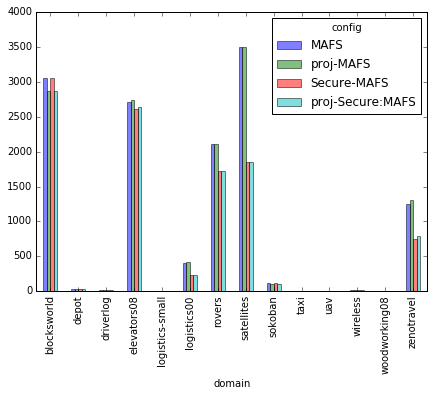

In [108]:
#plot real leakage values

#Scatterplot MAFS vs. Secure-MAFS
#print(data)
datal = data.loc[(data['nTo1Mapping']== 1) & (data['domain']!='lanterns')]
datal['config'] = datal[['SecureMAFS','projectedHeuristic']].apply(lambda x: '-'.join(x.map(str)), axis=1)
datal['domain_problem'] = datal[['domain','problem']].apply(lambda x: '-'.join(x.map(str)), axis=1)

datal = datal[['config','domain','leakage']]

datal = datal.groupby( [ 'config','domain'] ).mean()
datal = datal.reset_index()

datalp = datal.pivot(index='domain', columns='config', values='leakage')

datalp[datalp < 0] = 0

datalp = datalp.reset_index()
#print(datalp)



datalp['dom'] = datalp.domain.str[:3]

datalp = datalp.rename(index=str, columns={'False-False':"MAFS",'False-True':"proj-MAFS",'True-False':"Secure-MAFS",'True-True':"proj-Secure:MAFS"})

#print(datalp)

#datal = datal[['dom','False-False','False-True','True-False','True-True']]


#datalp = datalp.sort_values(by=['domain','MAFS'])

datalp.plot.bar(stacked=False,x='domain',rot=90,figsize=[7,5],alpha=0.5)

plt.savefig('leakage_absolute_domain.pdf')